<a href="https://colab.research.google.com/github/Slakkimsetty/learning-style-classifier/blob/main/learning_style_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd           # For data manipulation and analysis
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns         # For beautiful statistical visualizations

sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("vark_data.csv")
df.head()

,Visual,Aural,Read/Write,Kinesthetic,Label
0,4,3,6,2,Read/Write
1,5,7,4,3,Aural
2,7,2,3,8,Kinesthetic
3,6,5,2,4,Visual
4,3,8,3,2,Aural


## **EDA:**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Visual       15 non-null     int64 
 1   Aural        15 non-null     int64 
 2   Read/Write   15 non-null     int64 
 3   Kinesthetic  15 non-null     int64 
 4   Label        15 non-null     object
dtypes: int64(4), object(1)
memory usage: 732.0+ bytes


In [6]:
df.describe()

,Visual,Aural,Read/Write,Kinesthetic
count,15.000000,15.000000,15.000000,15.000000
mean,4.266667,4.733333,3.933333,3.800000
std,1.624221,2.120198,1.907379,1.934647
min,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,2.500000,2.000000
50%,4.000000,4.000000,3.000000,3.000000
75%,5.500000,6.500000,6.000000,4.500000
max,7.000000,8.000000,7.000000,8.000000


In [7]:
df.isnull().sum()
#checking null values

,0
Visual,0
Aural,0
Read/Write,0
Kinesthetic,0
Label,0


**Bar Plot:**

This helps you see if your classes are balanced (similar number of samples in each category), Imbalanced data can lead to biased models.

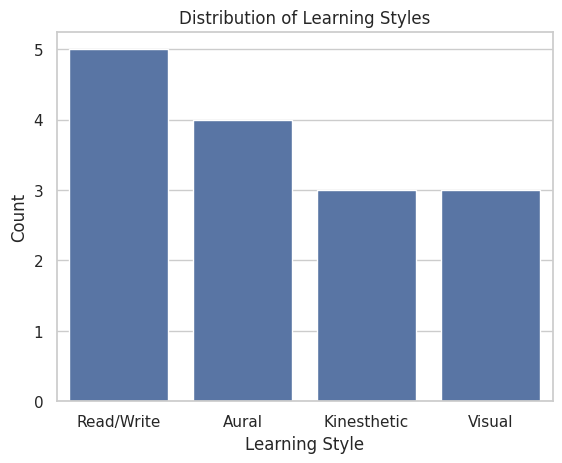

In [8]:
sns.countplot(x="Label", data=df)
plt.title("Distribution of Learning Styles")
plt.xlabel("Learning Style")
plt.ylabel("Count")
plt.show()

**Pair Plot:**

It creates scatter plots between every pair of features (like Visual vs Aural)

It Helps to spot clusters or patterns

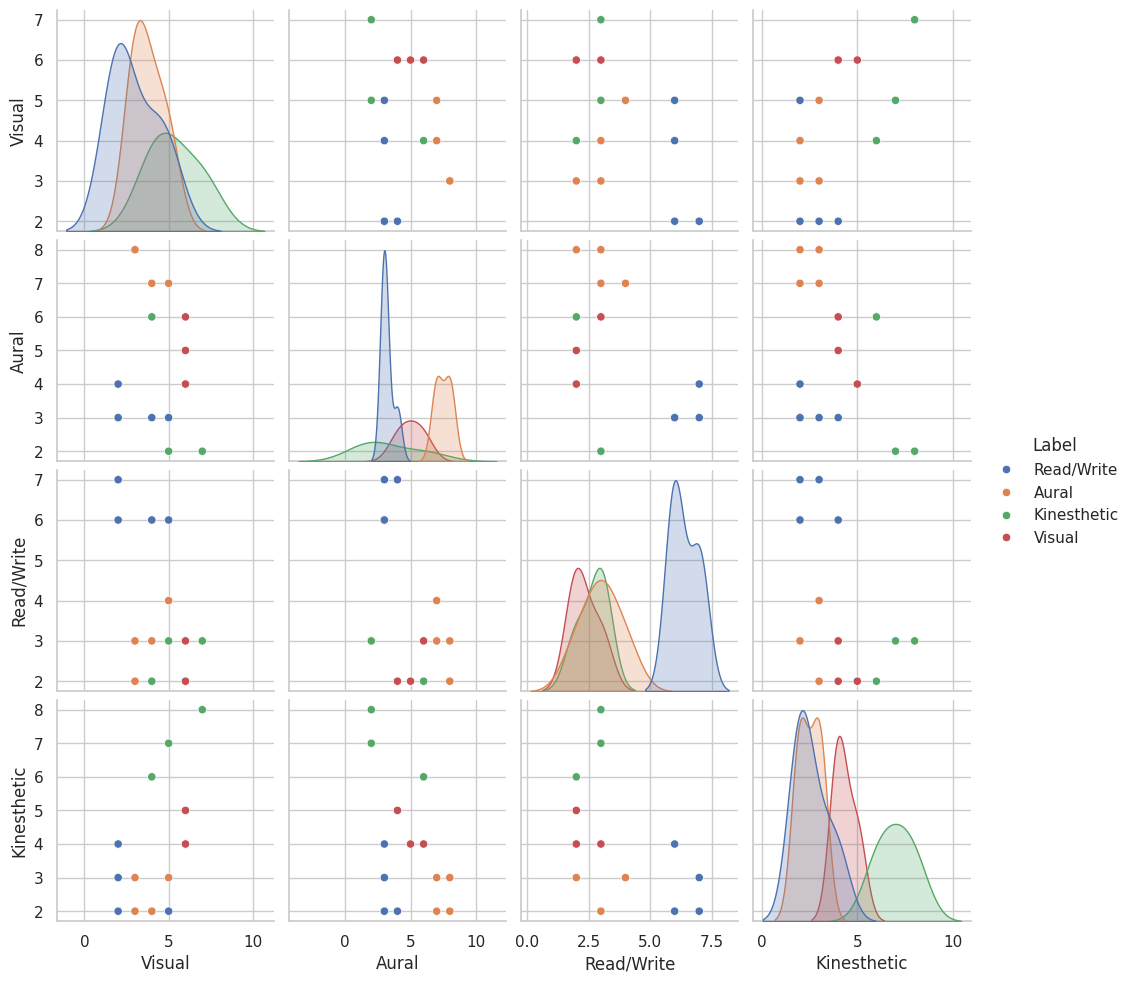

In [10]:
sns.pairplot(df, hue="Label")

**Heat Map:**

Correlation tells us how related two features are:

*   +1 = perfectly positively correlated

*   0 = no correlation

*   –1 = perfectly negatively correlated

If two features are highly correlated, one might be redundant.



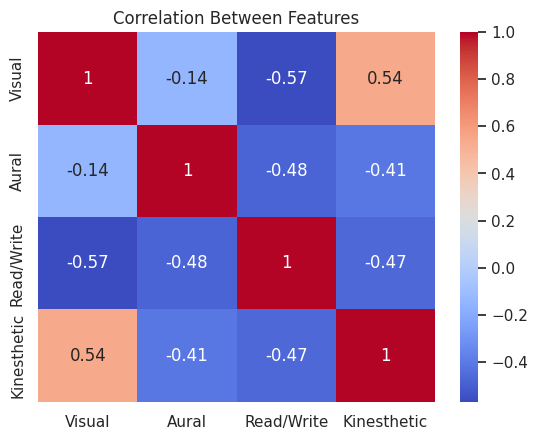

In [11]:
corr = df.drop("Label", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

# **Data Preprocessing & Model Buildng**

**Label Encoder:**

Changing text into number

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Apply to Label column
df['LabelEncoded'] = le.fit_transform(df['Label'])

# View mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_map)

Label Mapping: {'Aural': np.int64(0), 'Kinesthetic': np.int64(1), 'Read/Write': np.int64(2), 'Visual': np.int64(3)}


In [13]:
X = df[['Visual', 'Aural', 'Read/Write', 'Kinesthetic']]  # Features
y = df['LabelEncoded']  # Encoded labels
#splitting features and labels

In [14]:
#train/text data.
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

**Logistic Regression:**

A classification algorithm that predicts the probability of a class.

Works well when features and outcomes are linearly separable.

In [15]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_model = LogisticRegression()

# Train it on the training data
log_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
from sklearn.tree import DecisionTreeClassifier #A tree-like model where the data is split at decision node(handles both numerical & categoral data)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

In [25]:
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))

# Decision Tree Evaluation
print("\nDecision Tree Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))

# Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Decision Tree Accuracy: 0.8
Confusion Matrix:
 [[3 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.75      0.86         4
           3       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00   